# Aula 1

## Carregando os dados

In [ ]:
import pandas as pd

In [ ]:
passageiros = pd.read_csv('Passageiros.csv')

In [ ]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

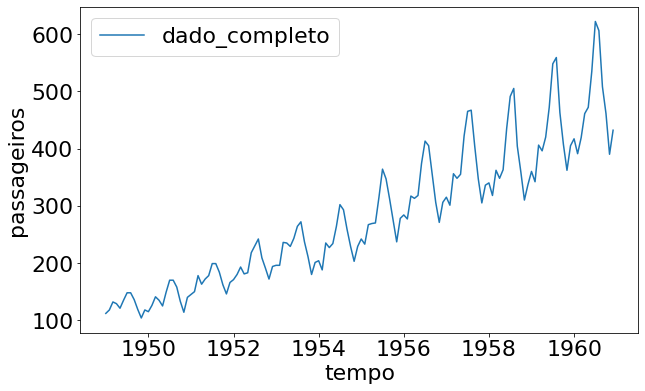

In [ ]:
sns.lineplot(x='tempo',y='passageiros', data=passageiros,label='dado_completo') 

## Escalando os dados

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
dado_escalado = sc.transform(passageiros)

In [ ]:
x=dado_escalado[:,0] #Features - Características - Tempo
y=dado_escalado[:,1] #Alvo - Número de passageiros

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

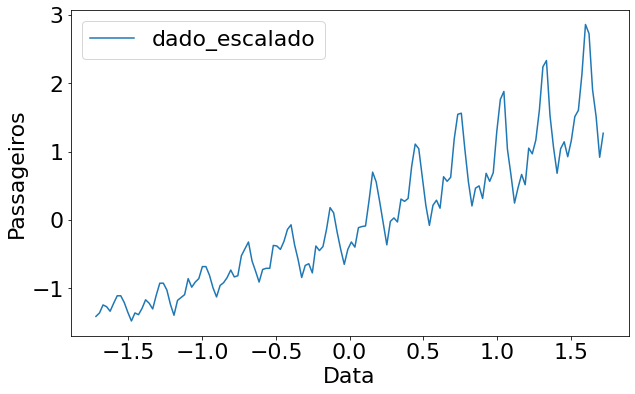

In [ ]:
sns.lineplot(x=x,y=y,label='dado_escalado') 
plt.ylabel('Passageiros')
plt.xlabel('Data')

## Dividindo em treino e teste

In [ ]:
tamanho_treino = int(len(passageiros)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(passageiros)-tamanho_treino #O resto vamos reservar para teste

In [ ]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [ ]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

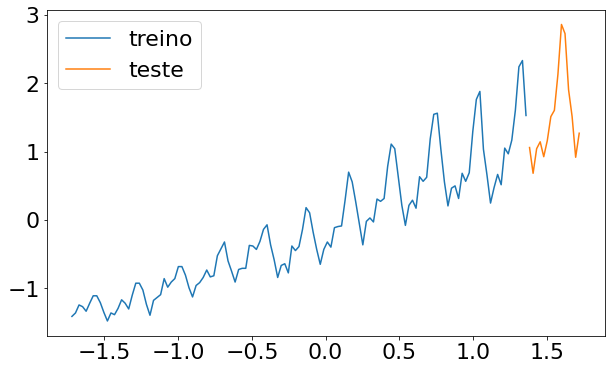

In [ ]:
sns.lineplot(x=xtreino,y=ytreino,label='treino') 
sns.lineplot(x=xteste,y=yteste,label='teste') 

# Aula 2

## Regressão Linear

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', 
                    activation='linear',use_bias=False))

In [ ]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1285


In [ ]:
y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

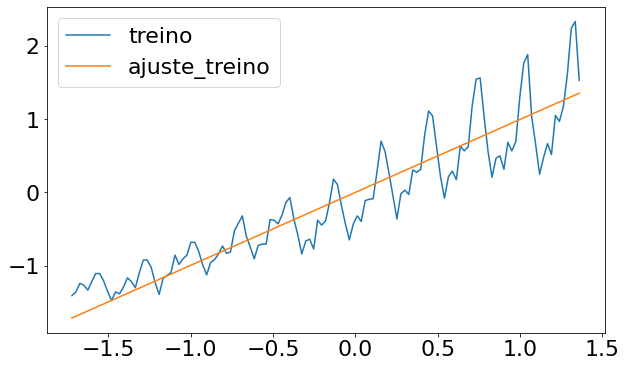

In [ ]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [ ]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [ ]:
resultados

,tempo,passageiros
0,-1.720064,-1.712280
1,-1.696007,-1.688332
2,-1.671950,-1.664384
3,-1.647894,-1.640436
4,-1.623837,-1.616488
...,...,...
124,1.262984,1.257269
125,1.287041,1.281217
126,1.311098,1.305165
127,1.335155,1.329113


In [ ]:
resultado_transf = sc.inverse_transform(resultados)

In [ ]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

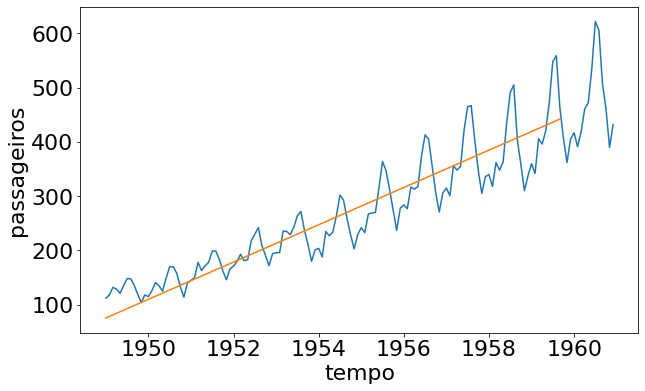

In [ ]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)

In [ ]:
y_predict_teste= regressor.predict(xteste) #Prevendo os dados de teste(o futuro)

In [ ]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [ ]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [ ]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

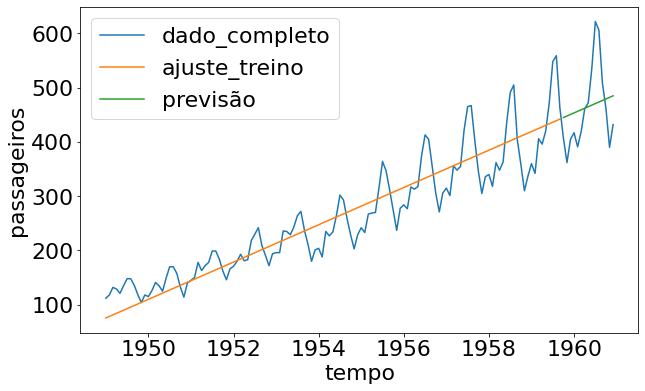

In [ ]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')

## Regressão não-linear

In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', 
                     activation='linear',use_bias=False))

In [ ]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8031
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7987
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7954
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7928
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7902
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7881
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7866
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7854
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7841
Epoch 10/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7825
Epoch 11/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7829
Epoch 12/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7814
Epoch 13/500
5/5 [==============================] - 0s 1ms/st

In [ ]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)

In [ ]:
y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

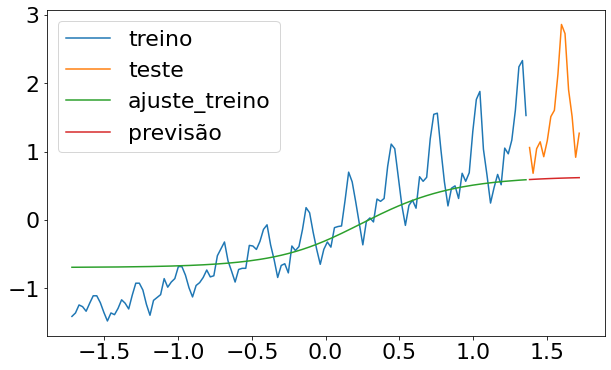

In [ ]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

# Aula 3

## Alterando a forma como passamos os dados

Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
import numpy as np

In [ ]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [ ]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [ ]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

## Agora vamos separar o teste

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

## Voltando para as redes neurais

In [ ]:
regressor3 = Sequential()

In [ ]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7641
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7432
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7195
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6988
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6774
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6529
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6277
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6063
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5738
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5415
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5084
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4693
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [ ]:
y_predict_novo = regressor3.predict(xtreino_novo)

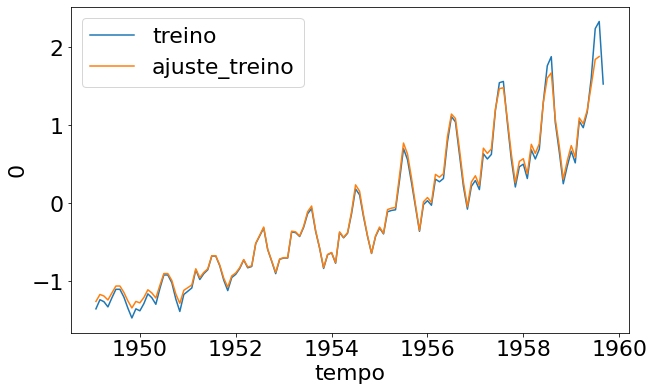

In [ ]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [ ]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

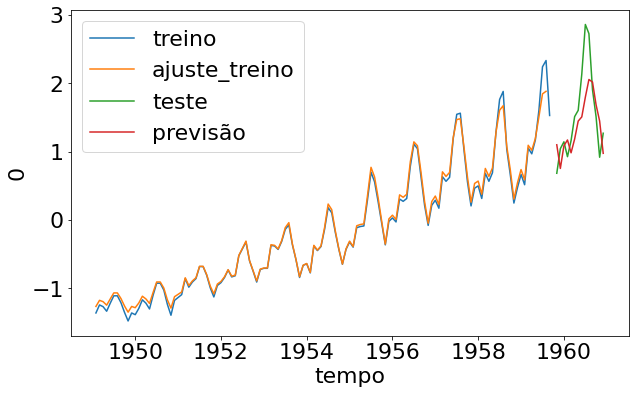

In [ ]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

## Janelas

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [ ]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [ ]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [ ]:
regressor4 = Sequential()

In [ ]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 0.8748
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.8068
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7776
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7554
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7582
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7592
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7548
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7478
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7409
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7312
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7233
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7145
Epoch 13/300
4/4 [==============================] - 0s 1ms/st

In [ ]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

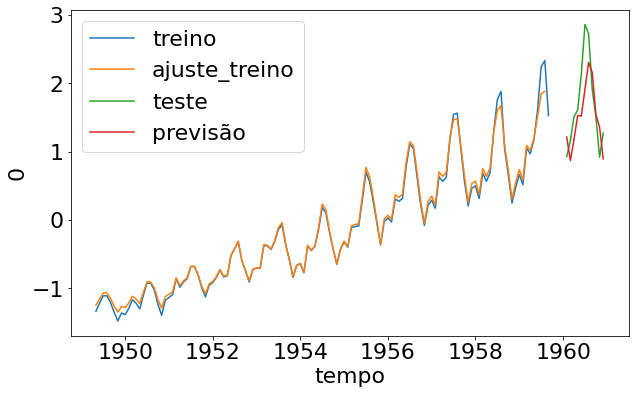

In [ ]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

# Aula 4

## LSTMs

In [ ]:
#Nova base de dados

In [ ]:
bike = pd.read_csv('bicicletas.csv')

In [ ]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

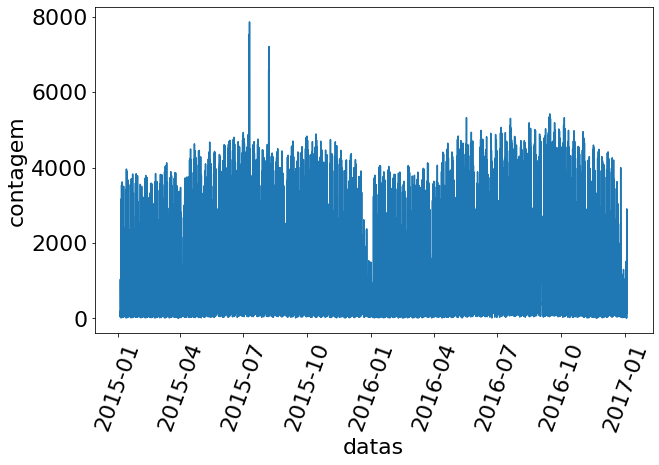

In [ ]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=70)

## Escalando os dados

In [ ]:
sc2 = StandardScaler()

In [ ]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

## Dividindo em treino e teste

In [ ]:
tamanho_treino = int(len(bike)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike)-tamanho_treino #O resto vamos reservar para teste

In [ ]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

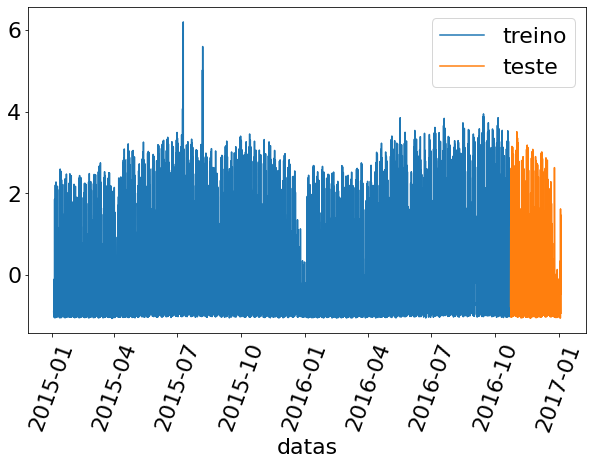

In [ ]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino') 
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=70) 

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [ ]:
xtreino_novo[0:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [ ]:
ytreino_novo[0:5]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

## O que a LSTM espera

A entrada de redes recorrentes deve possuir a seguinte forma para a entrada (número de amostras, número de passos no tempo, e número de atributos por passo no tempo).

In [ ]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [ ]:
xtreino_novo.shape

(15662, 10, 1)

In [ ]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

## Usando a LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
recorrente = Sequential()

In [ ]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))

In [ ]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 6s 12ms/step - loss: 0.2455 - val_loss: 0.0777
Epoch 2/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0756 - val_loss: 0.0399
Epoch 3/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0551 - val_loss: 0.0348
Epoch 4/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0463 - val_loss: 0.0334
Epoch 5/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0421 - val_loss: 0.0241
Epoch 6/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0389 - val_loss: 0.0214
Epoch 7/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0365 - val_loss: 0.0220
Epoch 8/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0347 - val_loss: 0.0261
Epoch 9/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0333 - val_loss: 0.0238
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.032

In [ ]:
y_ajustado = recorrente.predict(xtreino_novo)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

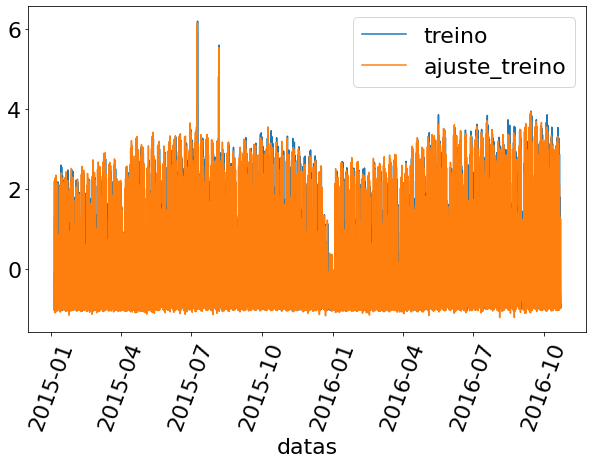

In [ ]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70) 

In [ ]:
y_predito = recorrente.predict(xteste_novo)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

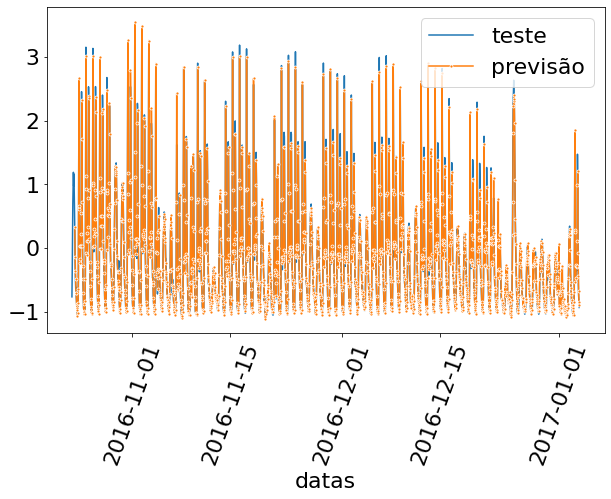

In [ ]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70) 

# Aula 5

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
recorrente_g = Sequential()

In [ ]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))

In [ ]:
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 5s 10ms/step - loss: 0.2204 - val_loss: 0.0747
Epoch 2/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0716 - val_loss: 0.0451
Epoch 3/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0497 - val_loss: 0.0392
Epoch 4/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0419 - val_loss: 0.0291
Epoch 5/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0387 - val_loss: 0.0411
Epoch 6/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0367 - val_loss: 0.0206
Epoch 7/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0346 - val_loss: 0.0251
Epoch 8/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0333 - val_loss: 0.0230
Epoch 9/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0321 - val_loss: 0.0267
Epoch 10/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0313 -

In [ ]:
y_predito2 = recorrente_g.predict(xteste_novo)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

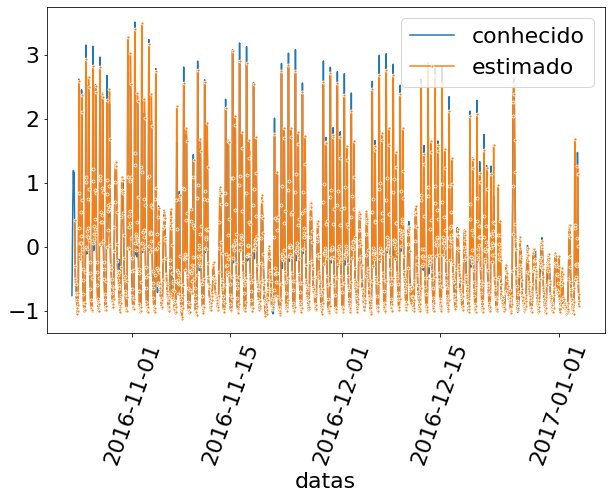

In [ ]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70) 

In [ ]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


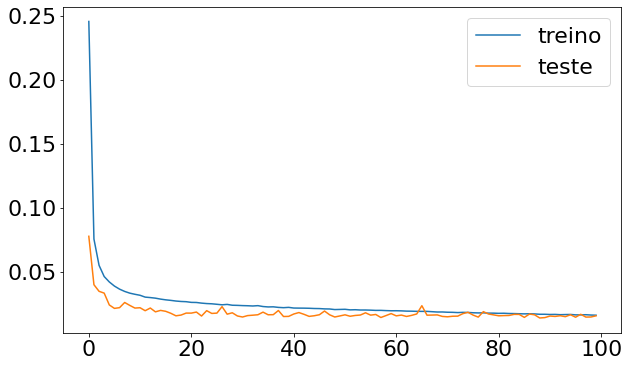

In [ ]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

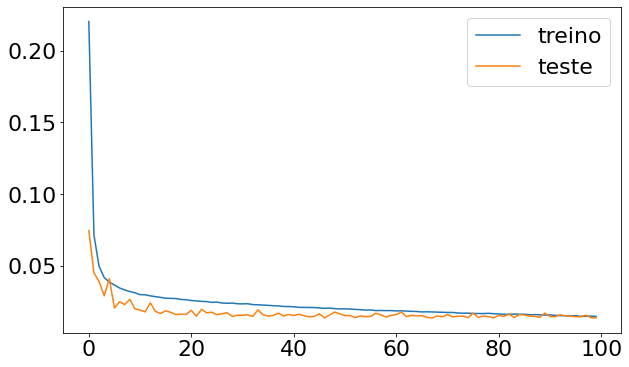

In [ ]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
